In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!pip install statsmodels

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [51]:
india_em = pd.read_csv('India_emis.csv')
china_em = pd.read_csv('China_emis.csv')

india_pop = pd.read_csv('India_pop_final.csv')
china_pop = pd.read_csv('China_pop_final.csv')

china_em.drop(columns='Unnamed: 0',inplace= True)
india_em.drop(columns='Unnamed: 0',inplace= True)

In [53]:
#normalising emission value with respect to the population 
#can be doone by just dividing these both to get a generalised data

In [67]:
print(china_em.info(), '\n',
india_em.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   years             30 non-null     int64  
 1   Emission  in KTs  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            30 non-null     int64  
 1   Emission in kT  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None 
 None


In [66]:
for i in range (0,30):
    china_em['Emission  in KTs'][i]=china_em['Emission  in KTs'][i]/china_pop['Population'][i]
for i in range (0,30):
    india_em['Emission in kT'][i]=india_em['Emission in kT'][i]/india_pop['Population'][i] 

C:\Users\Tony\AppData\Local\Temp\ipykernel_51172\1898560702.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  china_em['Emission  in KTs'][i]=china_em['Emission  in KTs'][i]/china_pop['Population'][i]
C:\Users\Tony\AppData\Local\Temp\ipyke

In [68]:
china_em.set_index('years',inplace=True)
india_em.set_index('Year',inplace=True)

In [69]:
#Finding the p value. The p value must fall below 0.05. We find that applying df.diff.dropna() twice.
#gives a p value close to zero. This means that d value is 2 and 
#we choose q value as 2 from the set {0,1,2} for best performance

In [72]:
result = adfuller(china_em['Emission  in KTs'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.972304
p-value: 1.000000


In [73]:
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623


In [74]:
#Running the model for China
model = ARIMA(china_em['Emission  in KTs'], order=(1,2,2))
results = model.fit()
predictions = results.predict(start=0, end=41)

C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tony\AppData\Local\Programs\Python\

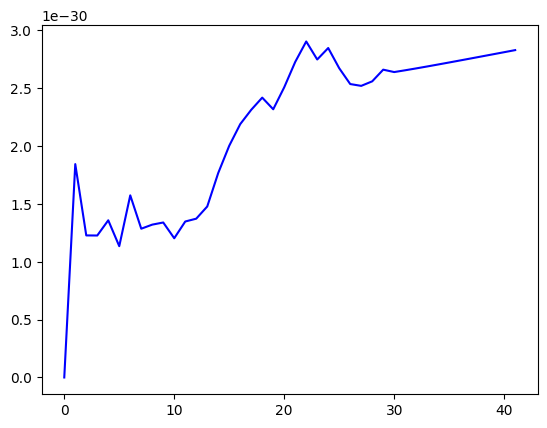

In [77]:
#Plotting the required predictions
plt.plot(predictions, color='blue')
plt.show()

In [75]:
#Running the model for India
model1=ARIMA(india_em['Emission in kT'], order=(1,2,2))
results1 =model1.fit()
predictions1=results1.predict(start=0,end=41)

C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Tony\AppData\Local\Programs\Python\

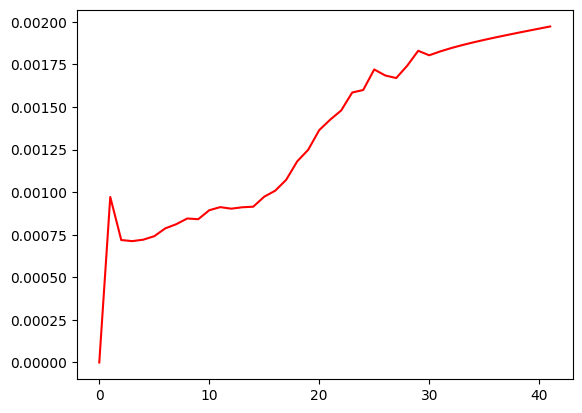

In [76]:
#Plotting the required predictions
plt.plot(predictions1, color='red')
plt.show()

ARIMA stands for AutoRegressive Integrated Moving Average. It is a statistical tool which is used for time series data for analysing and prediction of future trends. To apply ARIMA effectively the dataset needs to be made stationary by differencing the data

ARIMA has 3 parameters : p,d,q

p : the number of lag observations in the model, also known as the lag order.
d : the number of times the raw observations are differenced to make ; also known as the degree of differencing.
q : the size of the moving average window, also known as the order of the moving average. We import the model. We are trying to predict the future trends for China and India and knowing that China has implemented Carbon Pricing while India has not, we expect China to perform better.
As the absolute values for China are much larger owing to the country size, we need to normalise the values. For the purpose of normalisation, I have used population values from 1990 to 2019 for both India and China and saved them in CSV files(uploaded in the main branch). Any other relevant normalising factor can also be used, for example area of the country.

We divide the values. To apply ARIMA model we need p value below 0.05, initially the dataset gives p value as 0.94, as it is not differenced. On differencing twice we get an optimal value of p and so d value is 2 (this step has not been shown in the final code as we are concerned with this step only to get d value). We run the model for both the countries, plot and compare the predictions.